In [115]:
import pandas as pd
import requests
pd.set_option('display.max_columns', None)
import time
import numpy as np


In [116]:
file = 'nba_2023.csv'
df = pd.read_csv(file)

players = df[["Player", "PER", "TS%", "USG%", "OBPM", "DBPM", "WS", "MVP"]]
print(players.head(144))

               Player   PER    TS%  USG%  OBPM  DBPM   WS  MVP
0    Precious Achiuwa  15.2  0.554  19.4  -1.4  -0.8  2.2  0.0
1        Steven Adams  17.5  0.564  14.6  -0.3   0.9  3.4  0.0
2         Bam Adebayo  20.1  0.592  25.2   0.8   0.8  7.4  0.0
3        Ochai Agbaji   9.5  0.561  15.8  -1.7  -1.4  1.3  0.0
4        Santi Aldama  13.9  0.591  16.0  -0.3   0.8  4.6  0.0
..                ...   ...    ...   ...   ...   ...  ...  ...
139     Stephen Curry  24.1  0.656  31.0   7.5   0.1  7.8  0.0
140     Dyson Daniels   8.8  0.503  11.6  -3.4   1.6  1.3  0.0
141     Anthony Davis  27.8  0.627  28.4   4.6   1.7  9.0  0.0
142      Johnny Davis   7.2  0.446  20.5  -5.8  -1.7 -0.3  0.0
143     Terence Davis  12.9  0.563  22.2  -1.3  -0.3  0.9  0.0

[144 rows x 8 columns]


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


<Axes: xlabel='Player'>

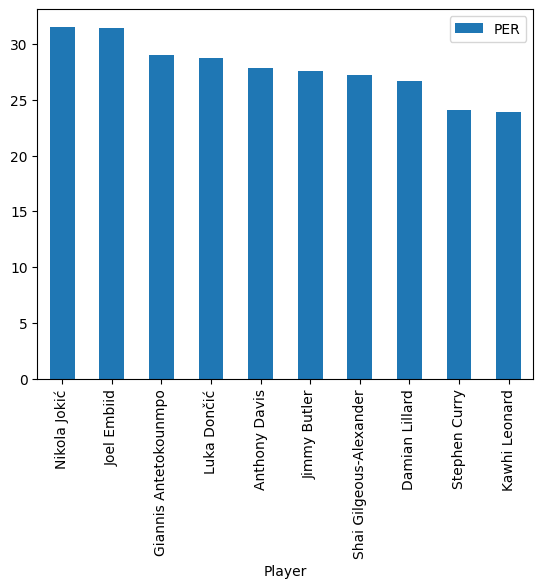

In [118]:
highest_scoring = df[df["G"] >50].sort_values("PER", ascending=False).head(10)
highest_scoring.plot.bar("Player", "PER")


In [119]:
predictors_to_fill = ["PER", "TS%", "USG%", "OBPM", "DBPM", "WS"]
for predictor in predictors_to_fill:
    median_value = df[predictor].median()
    df.loc[df[predictor].isnull(), predictor] = median_value

df["MVP"] = df["MVP"].fillna(0)

# Select predictors and target variable
X = df[["PER", "TS%", "USG%", "OBPM", "DBPM", "WS"]]
y = df["MVP"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Get player names of the predicted MVP candidates
predicted_mvp_players = df.loc[y_test.index[y_pred == 1], "Player"]

# Combine player names with predictions
predictions_with_names = df.loc[y_test.index[y_pred == 1], ["Player", "MVP"]]

print(predictions_with_names)

Empty DataFrame
Columns: [Player, MVP]
Index: []


In [120]:
"""
# Step 1: Filter players who have played over 60 games
df_over_60_games = df[df['G'] > 60].copy()

# Step 2: Calculate composite score based on predictor values
# You can define your own composite score calculation based on your criteria
# For example, you can sum the z-scores of predictor values for each player
predictors = ["PER", "TS%", "USG%", "OBPM", "DBPM", "WS"]
df_over_60_games.loc[:, 'Composite Score'] = df_over_60_games[predictors].sum(axis=1)

# Step 3: Rank players based on composite score
df_over_60_games_ranked = df_over_60_games.sort_values(by='Composite Score', ascending=False)

# Step 4: Output the best candidate for MVP
best_candidate = df_over_60_games_ranked.iloc[0]  # Select the player with the highest composite score

print("Best candidate for MVP based on predictor values and playing over 60 games:")
print(best_candidate['Player'])  # Output the player's name

"""

'\n# Step 1: Filter players who have played over 60 games\ndf_over_60_games = df[df[\'G\'] > 60].copy()\n\n# Step 2: Calculate composite score based on predictor values\n# You can define your own composite score calculation based on your criteria\n# For example, you can sum the z-scores of predictor values for each player\npredictors = ["PER", "TS%", "USG%", "OBPM", "DBPM", "WS"]\ndf_over_60_games.loc[:, \'Composite Score\'] = df_over_60_games[predictors].sum(axis=1)\n\n# Step 3: Rank players based on composite score\ndf_over_60_games_ranked = df_over_60_games.sort_values(by=\'Composite Score\', ascending=False)\n\n# Step 4: Output the best candidate for MVP\nbest_candidate = df_over_60_games_ranked.iloc[0]  # Select the player with the highest composite score\n\nprint("Best candidate for MVP based on predictor values and playing over 60 games:")\nprint(best_candidate[\'Player\'])  # Output the player\'s name\n\n'

In [121]:
import pandas as pd

# Example loading individual year data
df_2019 = pd.read_csv("nba_2019.csv")
df_2020 = pd.read_csv("nba_2020.csv")
df_2021 = pd.read_csv("nba_2021.csv")
df_2022 = pd.read_csv("nba_2022.csv")
df_2023 = pd.read_csv("nba_2023.csv")
df_2012 = pd.read_csv("nba_2012.csv")


def prepare_data(df):
    df_filtered = df[df['G'] > 60]  # Filter based on games played
    # Further preprocessing here (e.g., renaming, handling NA)
    return df_filtered

dfs = [prepare_data(df) for df in [df_2019, df_2020, df_2021, df_2022, df_2023]]

# Concatenate all DataFrames
training_data = pd.concat(dfs)

In [122]:
from sklearn.preprocessing import StandardScaler

predictors = ["PER", "TS%", "USG%", "OBPM", "DBPM", "WS"]
scaler = StandardScaler()

# Normalize predictors
training_data[predictors] = scaler.fit_transform(training_data[predictors])

In [123]:
from sklearn.linear_model import LogisticRegression

# Prepare the target and predictors
X_train = training_data[predictors]
y_train = training_data['MVP']

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)
print('Is the model fitted?', hasattr(model, 'classes_'))
print(y_train.value_counts())
print(df_2024_prepared[predictors].head())



Is the model fitted? True
MVP
0.0    946
1.0      5
Name: count, dtype: int64
        PER       TS%      USG%      OBPM      DBPM        WS
0 -0.117334 -0.635796 -0.638687 -0.790062  0.167131 -0.300746
3  1.028483  0.020733  0.972193  0.304242  1.345100  1.140299
4 -1.637746 -1.652356 -1.086154 -1.577960 -0.842556 -1.552179
7 -0.447859 -0.762866 -0.280714 -0.352340  0.251272 -0.679968
8 -0.932628  0.063090 -0.835572 -0.527429  1.008537  0.040554


In [124]:
df_2024 = pd.read_csv("nba_2024.csv")
df_2024_prepared = prepare_data(df_2024).copy()
df_2024_prepared.loc[:, predictors] = scaler.transform(df_2024_prepared[predictors])

# Predict
predictions = model.predict_proba(df_2024_prepared[predictors])[:, 1]
df_2024_prepared['MVP Probability'] = predictions

# Identify top candidate
top_candidate = df_2024_prepared.sort_values(by='MVP Probability', ascending=False).iloc[0]
top_5_mvp_candidates = df_2024_prepared.sort_values(by='MVP Probability', ascending=False).head(5)

print("Predicted MVP for 2024:")
print(top_candidate['Player'])

Predicted MVP for 2024:
Nikola Jokić


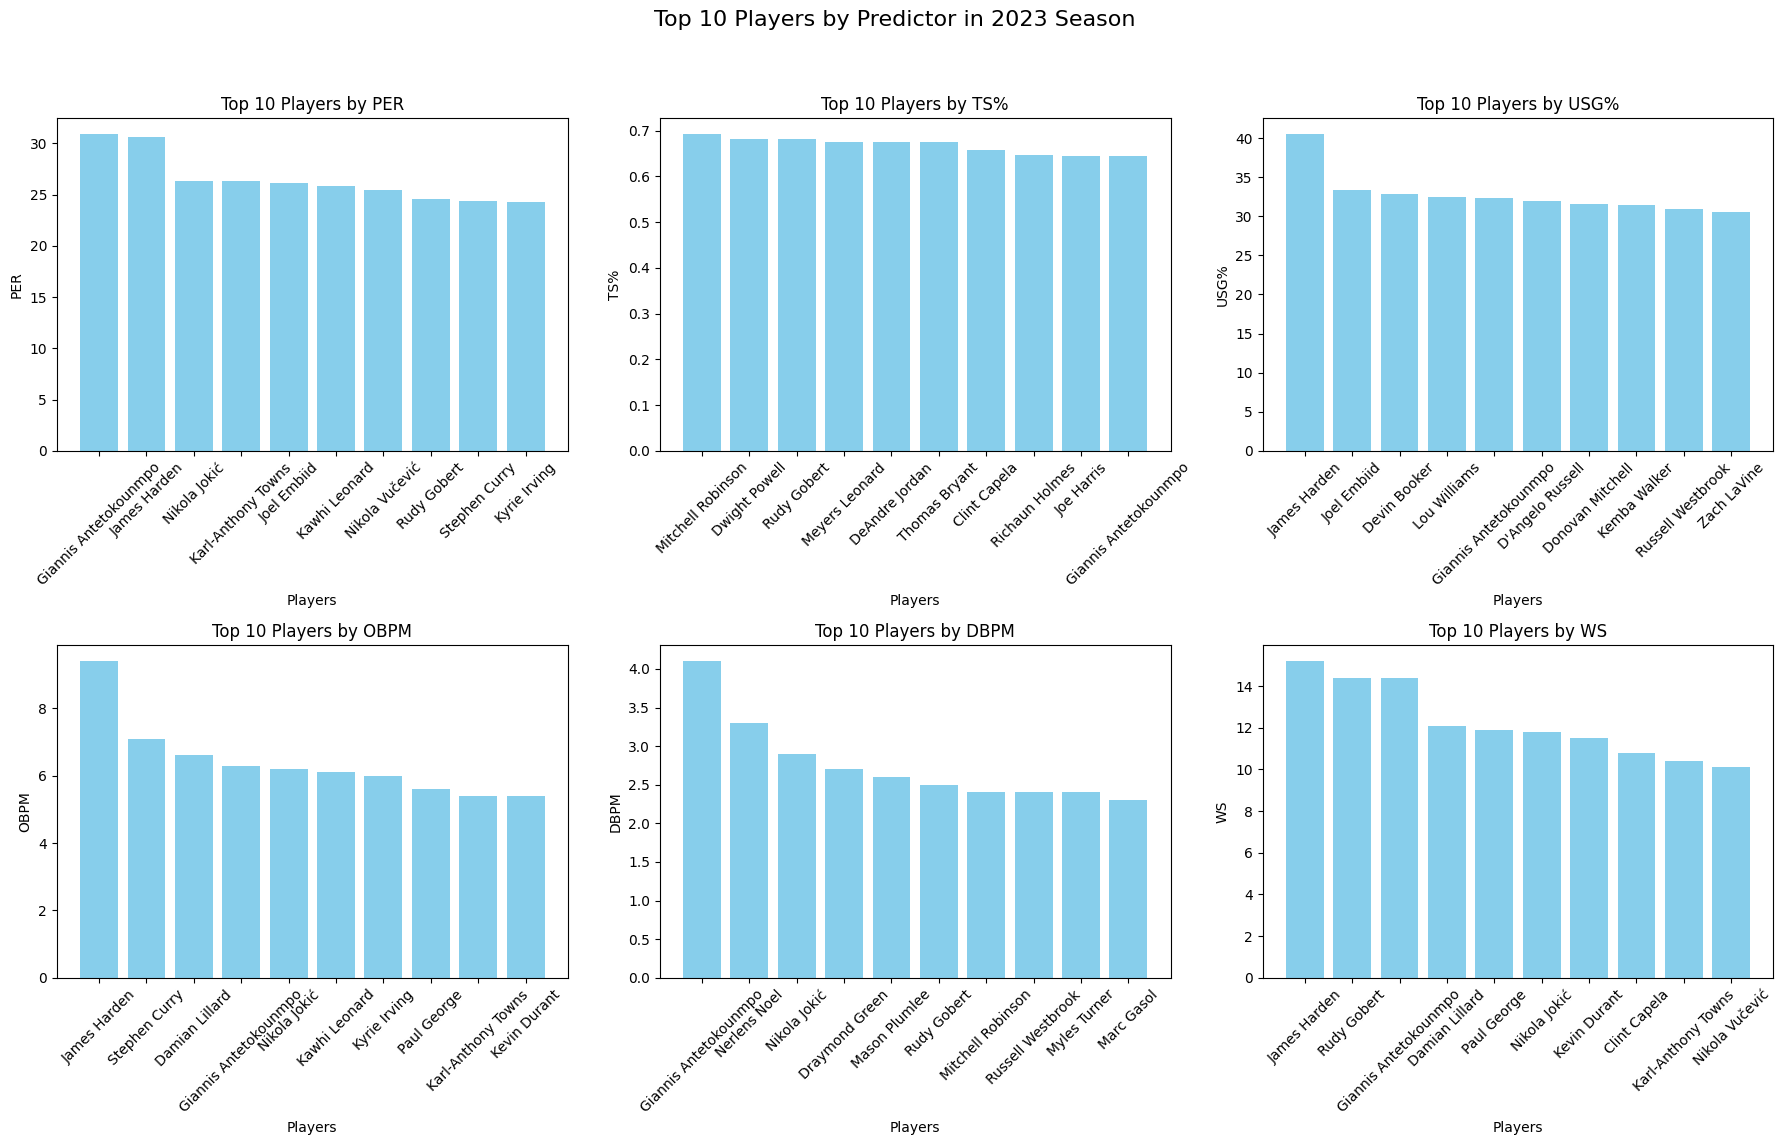

In [125]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_2023 is your DataFrame for the year 2023
df_2023 = pd.read_csv('nba_2019.csv')
df_60_plus_games = df_2023[df_2023['G'] >= 60]

predictors = ["PER", "TS%", "USG%", "OBPM", "DBPM", "WS"]

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.suptitle('Top 10 Players by Predictor in 2023 Season', fontsize=16)

for i, predictor in enumerate(predictors):
    # Sort the DataFrame by predictor and select the top 10
    top_players = df_60_plus_games.sort_values(by=predictor, ascending=False).head(10)
    
    ax = axes[i//3, i%3]  # Determine subplot position
    ax.bar(top_players['Player'], top_players[predictor], color='skyblue')
    ax.set_title(f'Top 10 Players by {predictor}')
    ax.set_xlabel('Players')
    ax.set_ylabel(predictor)
    ax.tick_params(axis='x', rotation=45)  # Rotate player names for better visibility

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()

In [131]:
df_2021_prepared = prepare_data(df_2024)
df_2021_prepared[predictors] = scaler.transform(df_2021_prepared[predictors])

# Predict
predictions = model.predict_proba(df_2021_prepared[predictors])[:, 1]
df_2021_prepared['MVP Probability'] = predictions

# Identify top candidate
top_candidate = df_2021_prepared.sort_values(by='MVP Probability', ascending=False).iloc[0]
top_5_mvp_candidates = df_2024_prepared.sort_values(by='MVP Probability', ascending=False).head(5)

print("Predicted MVP for 2024:")
print(top_candidate['Player'])

Predicted MVP for 2024:
Nikola Jokić


C:\Users\rishp\AppData\Local\Temp\ipykernel_36796\3423853669.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_prepared[predictors] = scaler.transform(df_2021_prepared[predictors])
C:\Users\rishp\AppData\Local\Temp\ipykernel_36796\3423853669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_prepared['MVP Probability'] = predictions


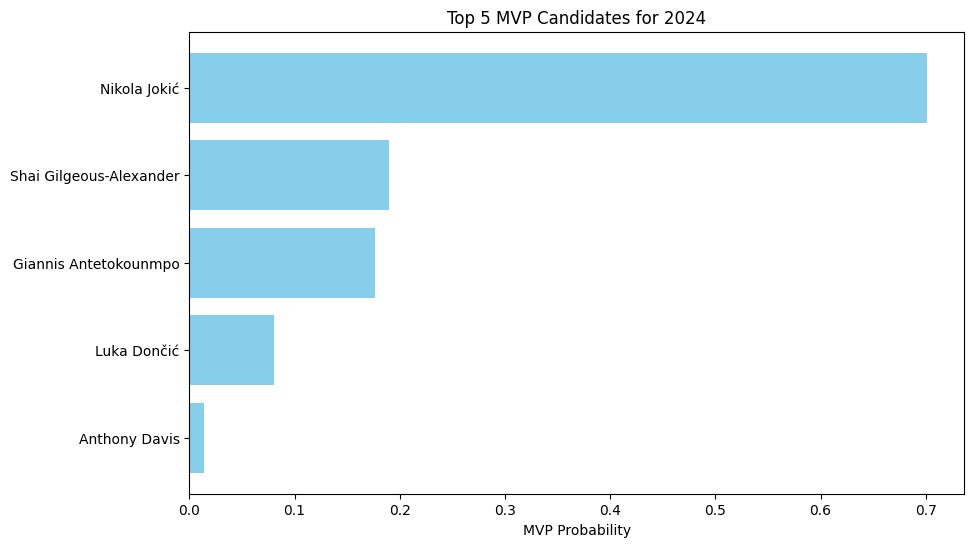

In [132]:
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a bar plot for the MVP probabilities
ax.barh(top_5_mvp_candidates['Player'], top_5_mvp_candidates['MVP Probability'], color='skyblue')

# Adding titles and labels
ax.set_xlabel('MVP Probability')
ax.set_title('Top 5 MVP Candidates for 2024')
plt.gca().invert_yaxis()  # Invert y axis to have the highest probability on top
plt.show()